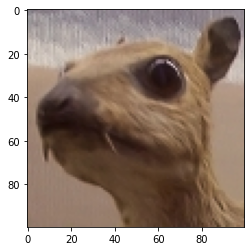

In [87]:
import collections
import numpy as np
import scipy.io as scio
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
ROOT = Path('.')
DATA = ROOT / 'data'
EXAMPLE_IMAGE = DATA / 'example_image.png'
OUTPUT = ROOT / 'output'
OUTPUT.mkdir(exist_ok=True)
image = mpimg.imread(EXAMPLE_IMAGE)
seed = 42
P = 10
plt.imshow(image)

In [88]:
def add_padding(image, P):

    ##### FILL HERE #####
    #### Question 1.1 ###
    padding_image = image
    h,w,F = image.shape
    padding_image = np.vstack((np.zeros((P,w,F)),padding_image,np.zeros((P,w,F))))
    padded_image = np.hstack((np.zeros((2*P+h,P,F)),padding_image,np.zeros((2*P+h,P,F))))
    #####################

    return padded_image

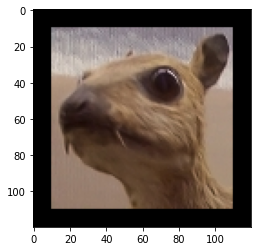

In [89]:
image = add_padding(image,10)
plt.imshow(image)

In [90]:
kernels  = np.zeros((3,3,3,3))
h,w,F_in,F_out = kernels.shape
a = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
for i in range(h):
    for j in range(w):
        kernels[i,j] = np.eye(3,3)*a[i,j]
print(np.zeros((1,2)))

[[0. 0.]]


In [91]:
a = [0 for i in range(2)]
print(a)

[0, 0]


In [92]:
def convolve(kernels, images, S):
    batch_size, h_in, w_in, F_in = images.shape
    F_out = kernels.shape[3]
    K = kernels.shape[0]
    assert F_in == kernels.shape[2], f'Size mismatch: images and kernels have different number of input filters ({F_in} != {kernels.shape[2]})'
    assert kernels.shape[0] == kernels.shape[1], 'Nonsquare kernel'

    h_out = (h_in - K) / S + 1
    w_out = (w_in - K) / S + 1

    assert int(h_out) == h_out and int(w_out) == w_out, 'Incompatible dimensions'
    h_out = int(h_out)
    w_out = int(w_out)

    ##### FILL HERE #####
    #### Question 1.2 ###
    out = np.zeros((batch_size,h_out,w_out,F_out))
    for n in range(batch_size):
        for p in range(h_out):
            for q in range(w_out):
                out[n,p,q] = [0 for _ in range(F_out)]
                for i in range(K):
                    for j in range(K):
                        out[n,p,q] += images[n,p*S+i,q*S+j]@kernels[i,j]
    #####################
    return out



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


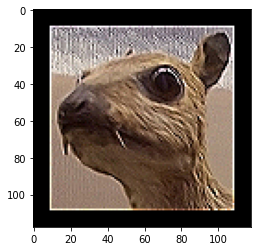

In [93]:
images = np.array([image])
out = convolve(kernels,images,1)
plt.imshow(out[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


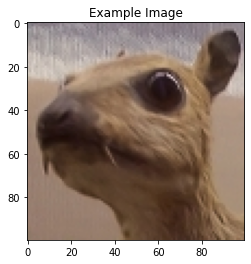

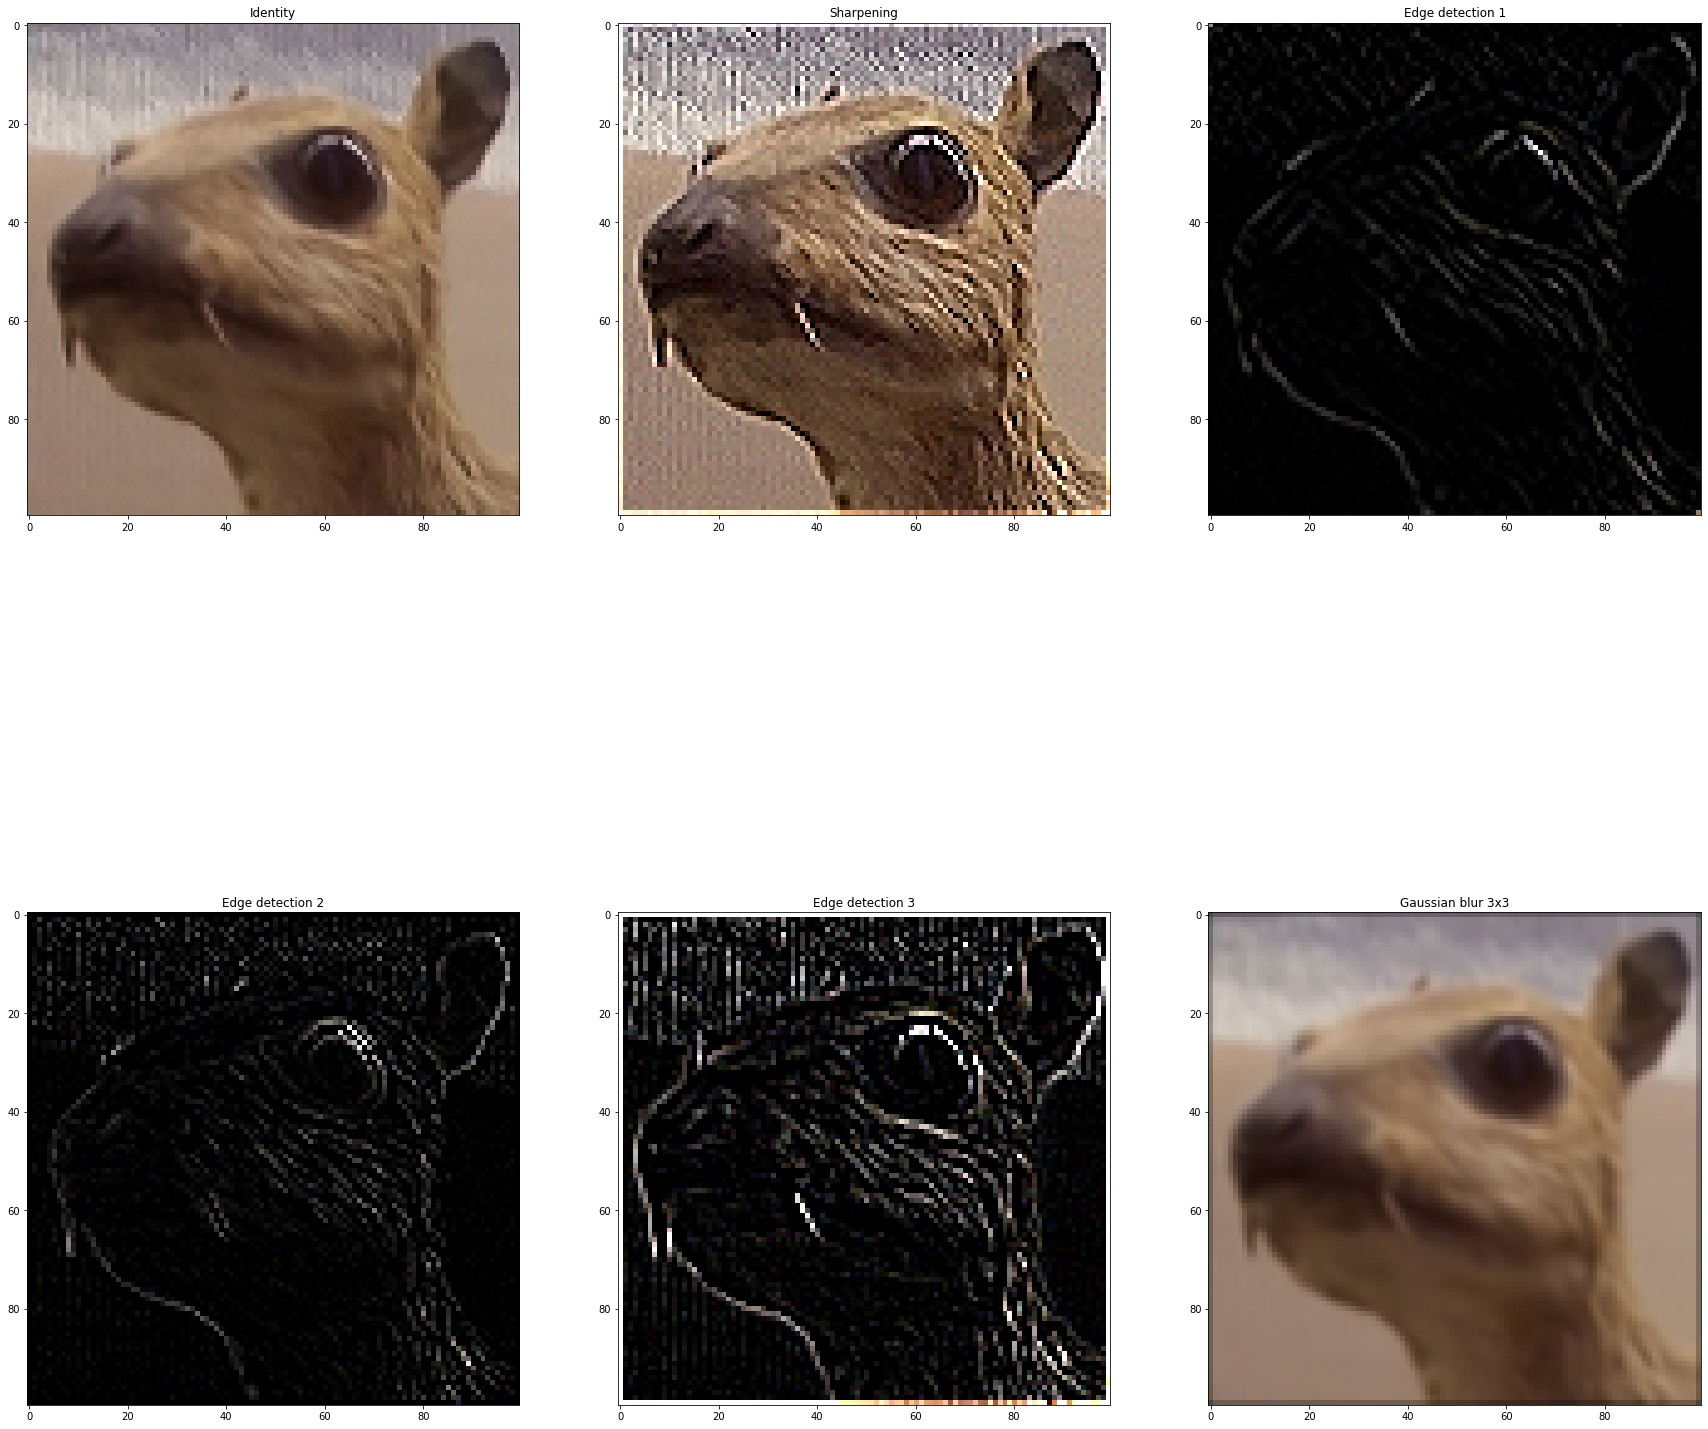

In [97]:
example_img = mpimg.imread(EXAMPLE_IMAGE)
plt.imshow(example_img)
plt.title('Example Image')

# Add a batch dimension to match with our requirements
example_img = example_img[np.newaxis, :, :, :]

##### FILL HERE #####
#### Question 1.3 ###
filtered_images = np.zeros((6, *example_img.shape[1:]), dtype=float)
######################
images = np.array([add_padding(example_img[i],1)])
kernel = np.zeros((6,3,3))
kernel[0] = np.array([[0,0,0],[0,1,0],[0,0,0]])
kernel[1] = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
kernel[2] = np.array([[1,0,-1],[0,0,0],[-1,0,1]])
kernel[3] = np.array([[0,1,0],[1,-4,1],[0,1,0]])
kernel[4] = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
kernel[5] = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
kernels  = np.zeros((6,3,3,3,3))
for n in range(6):
    for i in range(3):
        for j in range(3):
            kernels[n,i,j] = np.eye(3,3)*kernel[n][i,j]
for i in range(6):
    filtered_images[i] = convolve(kernels[i],images,1)

# You may need to re-order this list to have the correct titles
names = ['Identity', 'Sharpening', 'Edge detection 1', 'Edge detection 2', 'Edge detection 3', 'Gaussian blur 3x3']
fig, axs = plt.subplots(2, 3, figsize=(30,30))

for b in range(filtered_images.shape[0]):
    i = b // 3
    j = b % 3
    axs[i, j].imshow(filtered_images[b, :, :, :])
    axs[i, j].set_title(names[b])

In [95]:
add_padding(example_img[i],1)

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.51764709, 0.51372552, 0.53725493],
        [0.50980395, 0.49019608, 0.51764709],
        ...,
        [0.57254905, 0.53333336, 0.56862748],
        [0.58431375, 0.54509807, 0.57647061],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.50980395, 0.50196081, 0.52549022],
        [0.5529412 , 0.53725493, 0.56078434],
        ...,
        [0.55686277, 0.51764709, 0.54901963],
        [0.57647061, 0.54509807, 0.57254905],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.5529412 , 0.47450981, 0.40784314],
        [0.55686277, 0